 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
df_whale=pd.read_csv("Resources/whale_returns.csv", parse_dates=True, infer_datetime_format=True, index_col="Date")
df_whale.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
df_whale.isna().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
df_whale.dropna(inplace=True)


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [4]:
# Reading algorithmic returns
# create a Pandas dataframe from a csv file
df_algo=pd.read_csv("Resources/algo_returns.csv", parse_dates=True, infer_datetime_format=True, index_col="Date")
df_algo.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [5]:
# Count nulls
df_algo.isna().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [6]:
# Drop nulls
df_algo.dropna(inplace=True)

In [7]:
df_algo.isna().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [69]:
# Reading S&P 500 Closing Prices
# create a Pandas dataframe from a csv file
df_sp500=pd.read_csv("Resources/sp500_history.csv", parse_dates=True, infer_datetime_format=True, index_col="Date")
df_sp500.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [70]:
# Check Data Types
df_sp500.dtypes

Close    object
dtype: object

In [71]:
# Fix Data Type
df_sp500['Close'] = df_sp500['Close'].str.replace("$","")


c:\Users\yohan\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


In [72]:
df_sp500.head()

,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


In [73]:
df_sp500['Close']=df_sp500['Close'].astype("float")

In [74]:
df_sp500= df_sp500.pct_change()
df_sp500.dropna(inplace=True)
df_sp500.head()

,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [15]:

# Calculate Daily Returns
# first I created a separate list using for loop calculating daily returns
# then I inserted this list as a column to dataframe
#return_col = []
#for ele in range(1, len(df_sp500['Close'])):
 #   daily_return = df_sp500['Close'][ele] - df_sp500['Close'][ele-1]
  #  return_col.append(daily_return)
#return_col.insert(0,np.nan)
#df_sp500['SP500'] = return_col
#df_sp500.head()


,Close,SP500
Date,,
2019-04-23,2933.68,NaN
2019-04-22,2907.97,-25.71
2019-04-18,2905.03,-2.94
2019-04-17,2900.45,-4.58
2019-04-16,2907.06,6.61


In [75]:
# Drop nulls
df_sp500.dropna(inplace=True)

In [77]:
#Rename `Close` Column to be specific to this portfolio.
# instead of renaming it we are dropping it since we already have the one we want as extra col
df_sp500 = df_sp500.rename(columns={"Close":"SP500"})
df_sp500.head()

,SP500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


## Combine Whale, Algorithmic, and S&P 500 Returns

In [79]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([df_whale, df_algo, df_sp500],axis=1,join="inner")
combined_df.dropna(inplace=True)
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

In [80]:
# Plot daily returns of all portfolios
list(combined_df)


['SOROS FUND MANAGEMENT LLC',
 'PAULSON & CO.INC. ',
 'TIGER GLOBAL MANAGEMENT LLC',
 'BERKSHIRE HATHAWAY INC',
 'Algo 1',
 'Algo 2',
 'SP500']

<AxesSubplot:xlabel='Date'>

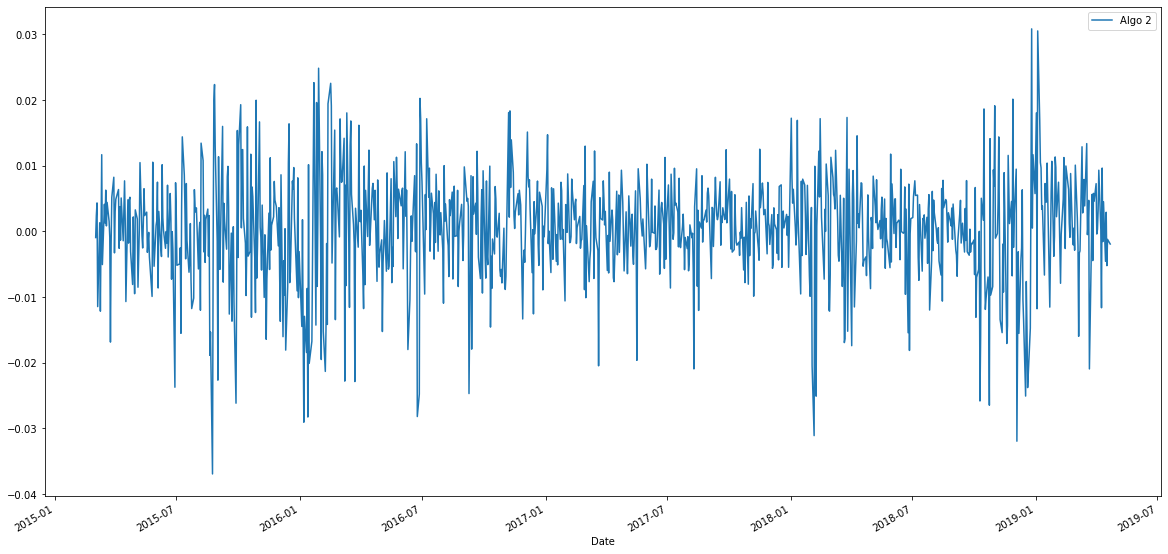

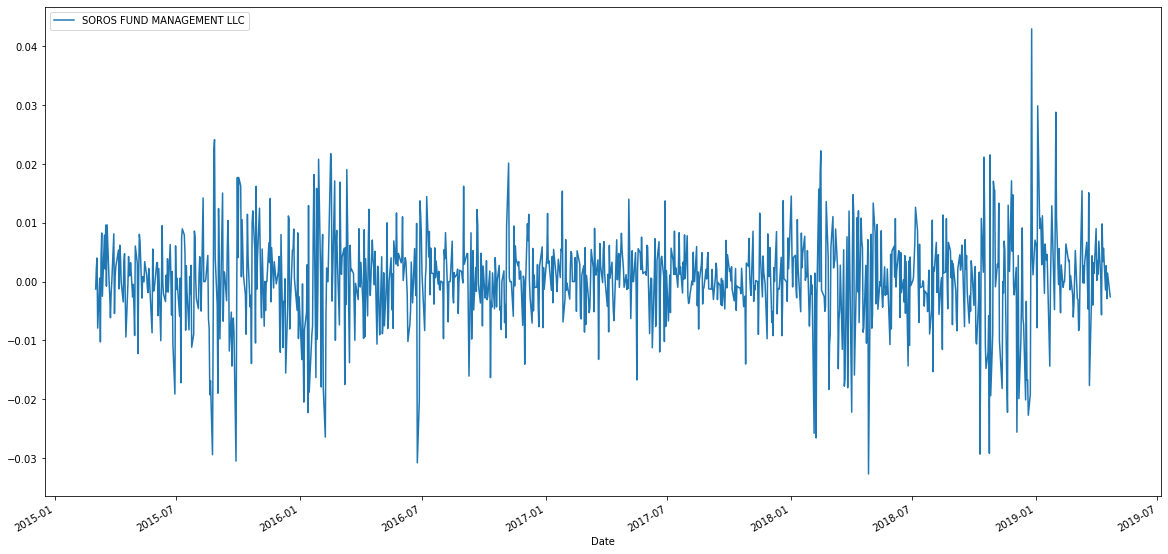

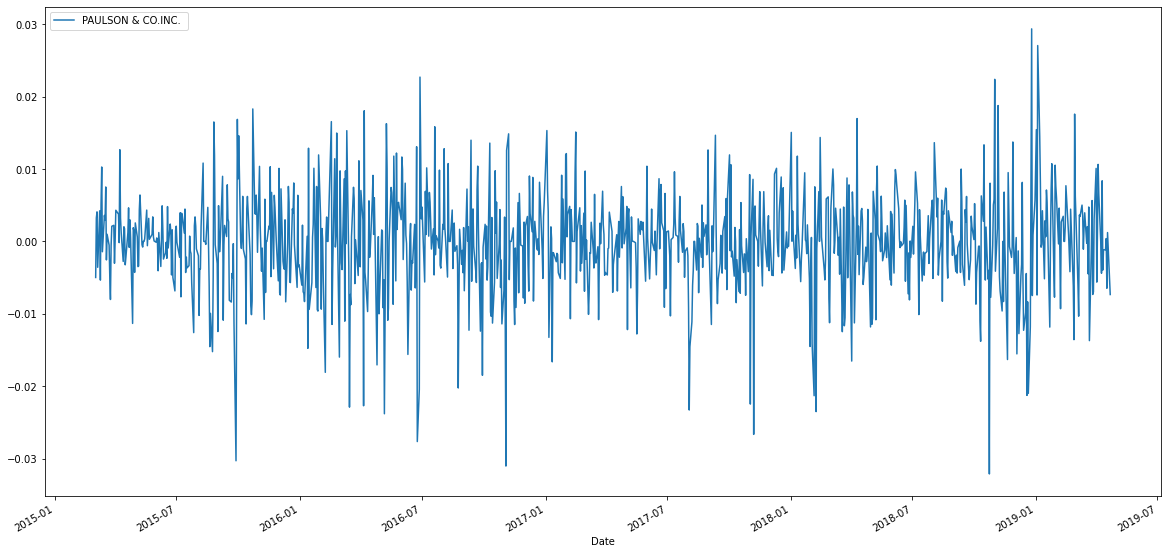

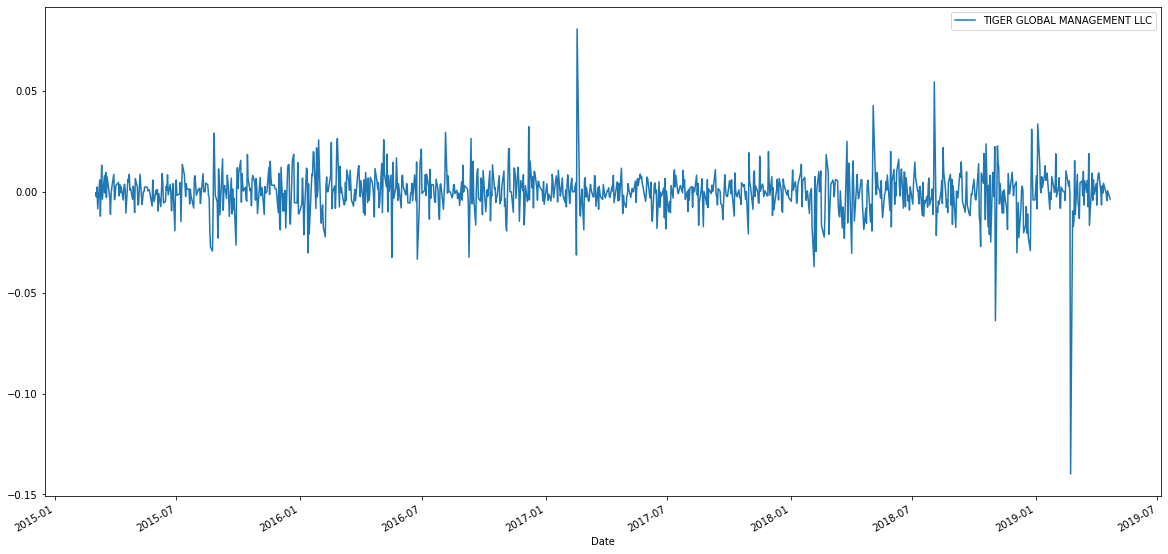

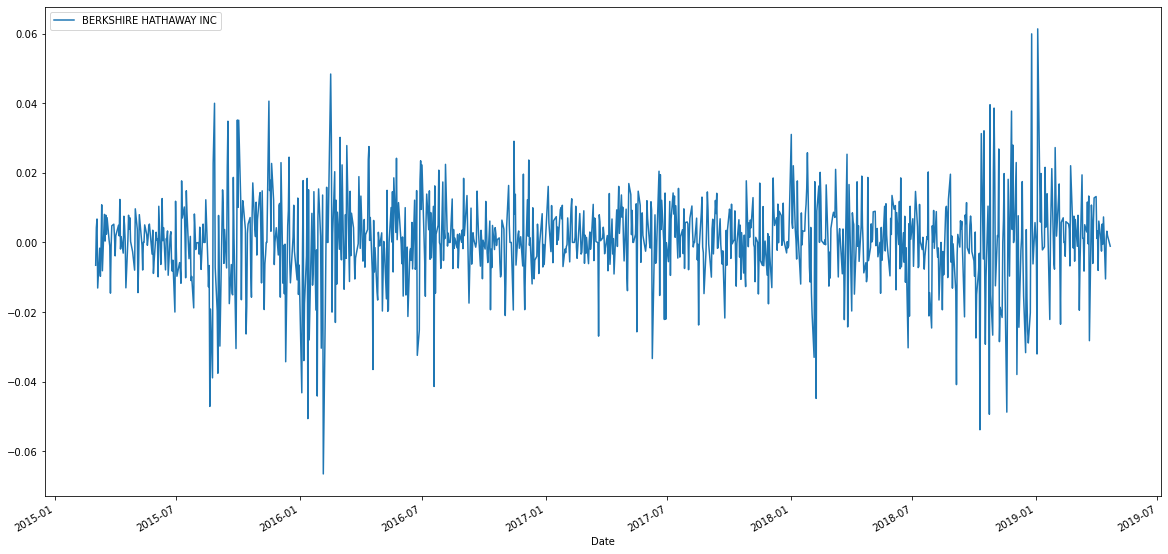

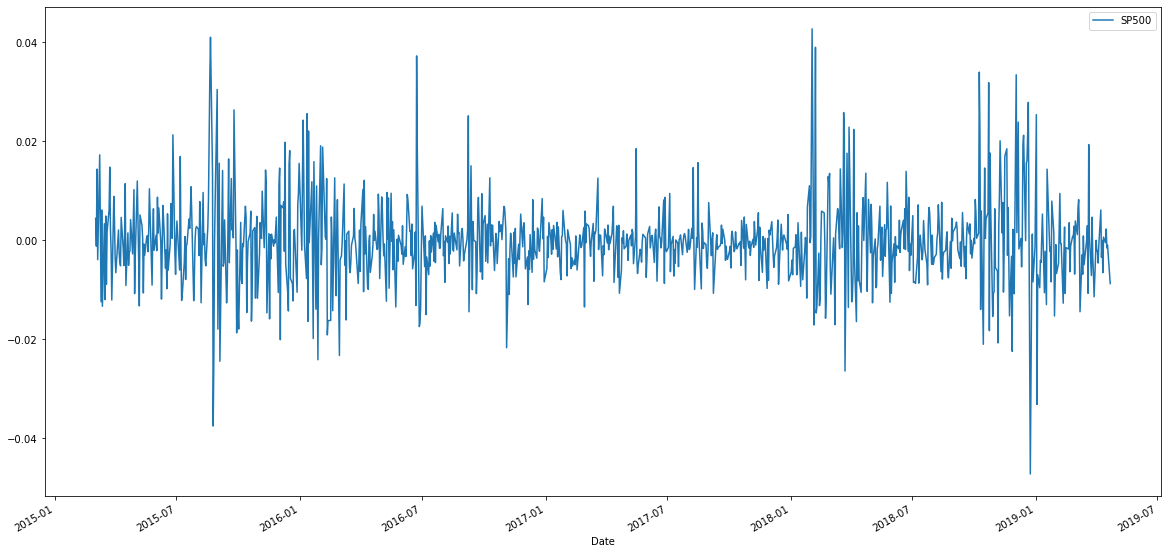

In [81]:

combined_df.plot(figsize=(20,10), use_index=True, y="Algo 2")
combined_df.plot(figsize=(20,10), use_index=True, y="SOROS FUND MANAGEMENT LLC")
combined_df.plot(figsize=(20,10),use_index=True, y="PAULSON & CO.INC. ")
combined_df.plot(figsize=(20,10),use_index=True, y="TIGER GLOBAL MANAGEMENT LLC")
combined_df.plot(figsize=(20,10),use_index=True, y="BERKSHIRE HATHAWAY INC")
combined_df.plot(figsize=(20,10),use_index=True, y="SP500")

#### Calculate and Plot cumulative returns.

In [82]:
# Calculate cumulative returns of all portfolios
combined_df.mean()

SOROS FUND MANAGEMENT LLC      0.000171
PAULSON & CO.INC.             -0.000217
TIGER GLOBAL MANAGEMENT LLC   -0.000089
BERKSHIRE HATHAWAY INC         0.000494
Algo 1                         0.000658
Algo 2                         0.000254
SP500                         -0.000281
dtype: float64

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

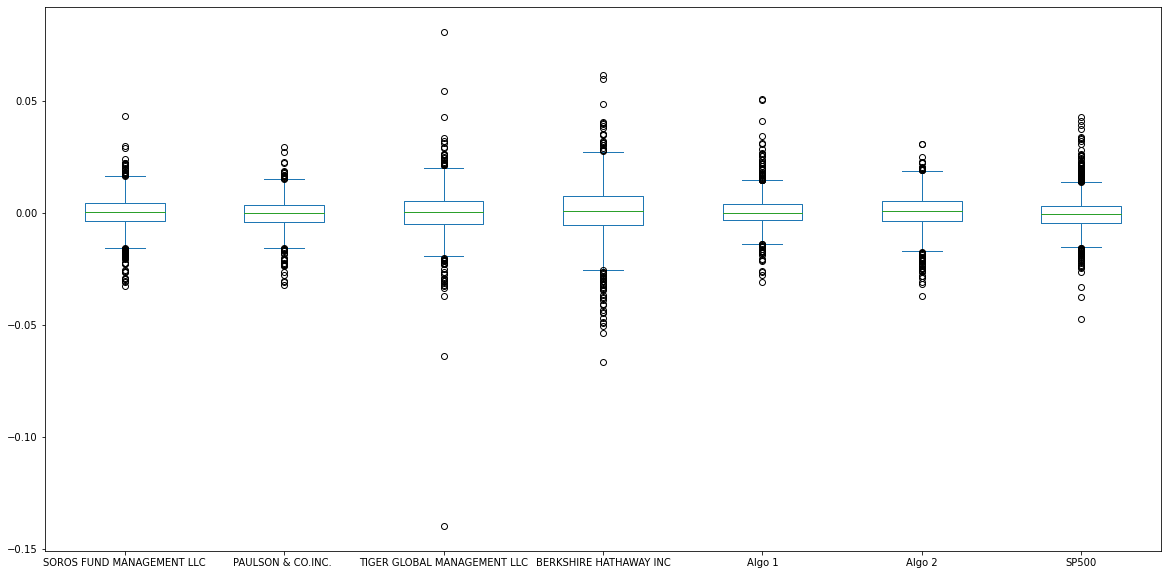

In [83]:
# Box plot to visually show risk
combined_df.plot.box(figsize=(20,10))

### Calculate Standard Deviations

In [84]:
# Calculate the daily standard deviations of all portfolios
combined_df.std()

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
SP500                          0.008587
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [86]:
# Calculate  the daily standard deviation of S&P 500
df_sp500.std()
# Determine which portfolios are riskier than the S&P 500
#Berkshire Hathaway and Tiger Global have a higher STD and are riskier

SP500    0.008135
dtype: float64

### Calculate the Annualized Standard Deviation

In [87]:
# Calculate the annualized standard deviation (252 trading days)
combined_df.std()*np.sqrt(252)

SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
Algo 1                         0.121006
Algo 2                         0.132413
SP500                          0.136313
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

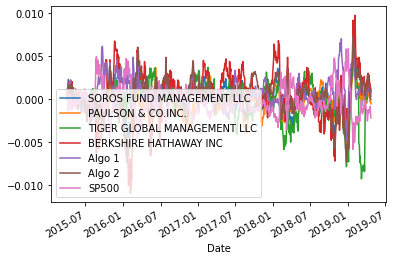

In [88]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window

combined_df.rolling(window=21)
# Plot the rolling standard deviation
combined_df.rolling(window=21).mean().plot()

### Calculate and plot the correlation

<AxesSubplot:>

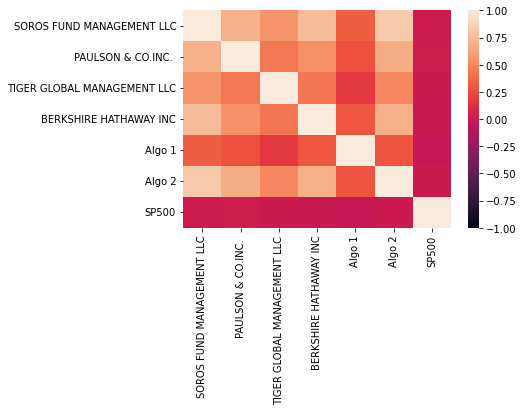

In [89]:
# Calculate the correlation
combined_df.corr()
# Display de correlation matrix
sns.heatmap(combined_df.corr(),vmin=-1,vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [90]:
# Calculate covariance of a single portfolio
cov_algo1 = combined_df["Algo 1"].cov(combined_df["SP500"])
# Calculate variance of S&P 500
print(cov_algo1)
var_sp500 = combined_df["SP500"].var()
print(var_sp500)
# Computing beta
beta_algo1 = cov_algo1/var_sp500
print(beta_algo1)
# Plot beta trend
beta_algo1.plot()

-2.223042551715513e-06
7.373467552840441e-05
-0.030149214542337578


AttributeError: 'numpy.float64' object has no attribute 'plot'

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [91]:
# Use `ewm` to calculate the rolling window
#df['4dayEWM'] = df['sales'].ewm(span=4, adjust=False).mean()
ewm_df = combined_df.ewm(span=21, adjust=False).std()
ewm_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,0.002472,0.005814,0.001441,0.007624,0.004700,0.002380,0.003962
2015-03-05,0.003128,0.005977,0.001886,0.008393,0.003419,0.003094,0.006154
2015-03-06,0.004173,0.004862,0.003918,0.007839,0.003006,0.005624,0.006358
2015-03-09,0.003664,0.005217,0.004396,0.006907,0.002827,0.004951,0.007638
...,...,...,...,...,...,...,...
2019-04-15,0.005817,0.005879,0.010209,0.008680,0.005619,0.006887,0.005300
2019-04-16,0.005551,0.005606,0.009747,0.008278,0.005812,0.006588,0.005175
2019-04-17,0.005487,0.005727,0.009415,0.007913,0.006320,0.006566,0.004936


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [92]:
# Annualized Sharpe Ratios
sr_combined = combined_df.mean() / combined_df.std()
asr_combined = sr_combined * np.sqrt(252)
asr_combined

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
SP500                         -0.518582
dtype: float64

<AxesSubplot:>

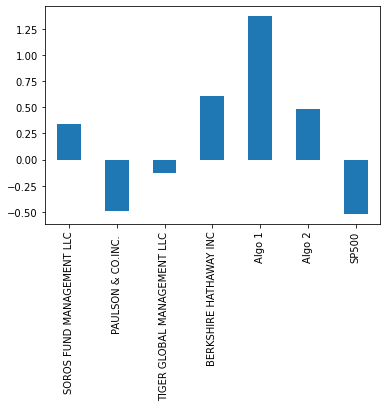

In [93]:
# Visualize the sharpe ratios as a bar plot
asr_combined.plot(kind="bar")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!
The higher the Sharpe ratio, the less risk and more return a fund has taken. So Algo 1 has outperformed them all by far.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [94]:
# Reading data from 1st stock
df_goog=pd.read_csv("Resources/goog_historical.csv", parse_dates=True, infer_datetime_format=True, index_col="Trade DATE")
# cleaning up to drop symbol column and rename other column as stock name
df_goog.drop(["Symbol"], axis = 1, inplace=True)
df_goog.rename(columns= {'NOCP':'Google'}, inplace=True)
#sorting the date so it's in ascending order like the previous dataframe
df_goog = df_goog.sort_index(ascending=True)
df_goog.head()

,Google
Trade DATE,
2018-05-11,1098.26
2018-05-14,1100.20
2018-05-15,1079.23
2018-05-16,1081.77
2018-05-17,1078.59


In [95]:
# Reading data from 2nd stock
df_aapl=pd.read_csv("Resources/aapl_historical.csv", parse_dates=True, infer_datetime_format=True, index_col="Trade DATE")
# cleaning up to drop symbol column and rename other column as stock name
df_aapl.drop(["Symbol"], axis = 1, inplace=True)
df_aapl.rename(columns= {'NOCP':'Apple'}, inplace=True)
#sorting the date so it's in ascending order like the previous dataframe
df_aapl = df_aapl.sort_index(ascending=True)
df_aapl.head()

,Apple
Trade DATE,
2018-05-11,188.59
2018-05-14,188.15
2018-05-15,186.44
2018-05-16,188.18
2018-05-17,186.99


In [96]:
# Reading data from 3rd stock
df_cost=pd.read_csv("Resources/cost_historical.csv", parse_dates=True, infer_datetime_format=True, index_col="Trade DATE")
# cleaning up to drop symbol column and rename other column as stock name
df_cost.drop(["Symbol"], axis = 1, inplace=True)
df_cost.rename(columns= {'NOCP':'Costco'}, inplace=True)
#sorting the date so it's in ascending order like the previous dataframe
df_cost = df_cost.sort_index(ascending=True)
df_cost.head()


,Costco
Trade DATE,
2018-05-11,195.76
2018-05-14,195.88
2018-05-15,195.48
2018-05-16,198.71
2018-05-17,199.60


In [97]:
# Combine all stocks in a single DataFrame
threestocks_df = pd.concat([df_goog, df_aapl, df_cost],axis=1,join="inner")
threestocks_df.head()

,Google,Apple,Costco
Trade DATE,,,
2018-05-11,1098.26,188.59,195.76
2018-05-14,1100.20,188.15,195.88
2018-05-15,1079.23,186.44,195.48
2018-05-16,1081.77,188.18,198.71
2018-05-17,1078.59,186.99,199.60


In [ ]:
# Reset Date index
#already done

In [ ]:
# Reorganize portfolio data by having a column per symbol
# already done

In [98]:
# drop nas first
threestocks_df.dropna()
# Calculate daily returns

threestocks_df = threestocks_df.pct_change()

# Drop NAs again
threestocks_df.dropna(inplace=True)

# Display sample data
threestocks_df.head()


,Google,Apple,Costco
Trade DATE,,,
2018-05-14,0.001766,-0.002333,0.000613
2018-05-15,-0.019060,-0.009088,-0.002042
2018-05-16,0.002354,0.009333,0.016523
2018-05-17,-0.002940,-0.006324,0.004479
2018-05-18,-0.011339,-0.003637,-0.003206


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [99]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
threestocksweight = threestocks_df.dot(weights)
# Display sample data

threestocksweight.head()


Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [100]:
# Join your returns DataFrame to the original returns DataFrame
allcomb_df = pd.concat([combined_df, threestocksweight],axis=1,join="inner")
allcomb_df.head()
#for some reason my portfolio is labeled as "0" and is hard to rename

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500,0
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.006889,0.000015
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.004044,-0.010064
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.000857,0.009403
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,0.002639,-0.001595
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.007333,-0.006061


In [101]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
allcomb_df.dropna(inplace=True)

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [102]:
# Calculate the annualized `std`

allcomb_df.std()*np.sqrt(252)

SOROS FUND MANAGEMENT LLC      0.146812
PAULSON & CO.INC.              0.116928
TIGER GLOBAL MANAGEMENT LLC    0.232898
BERKSHIRE HATHAWAY INC         0.247305
Algo 1                         0.133927
Algo 2                         0.139499
SP500                          0.152469
0                              0.211627
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:>

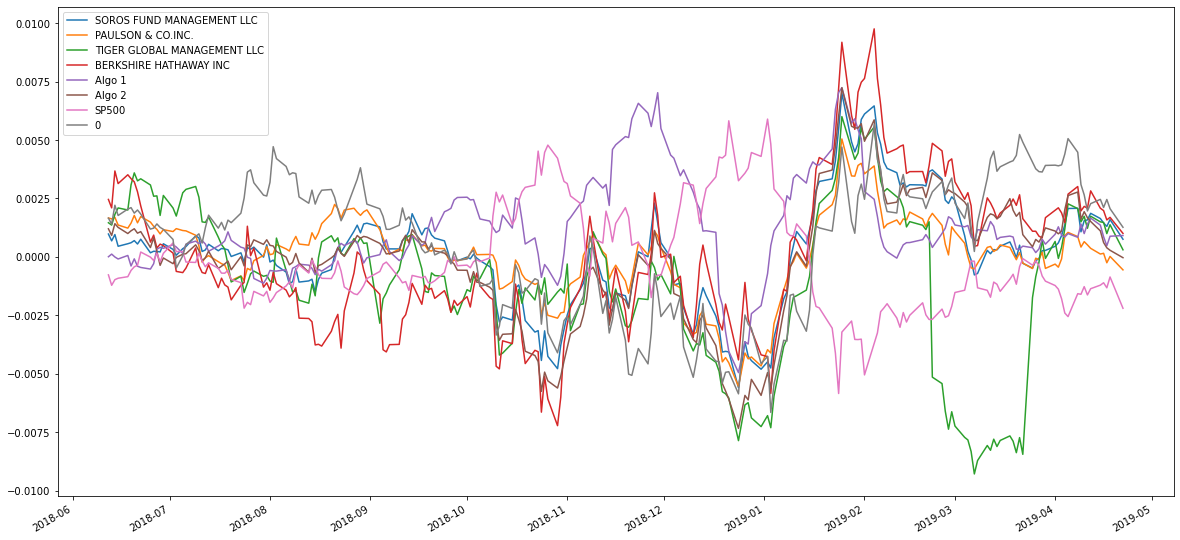

In [103]:
# Calculate rolling standard deviation
allcomb_df.rolling(window=21)
# Plot rolling standard deviation
allcomb_df.rolling(window=21).mean().plot(figsize=(20,10))

### Calculate and plot the correlation

<AxesSubplot:>

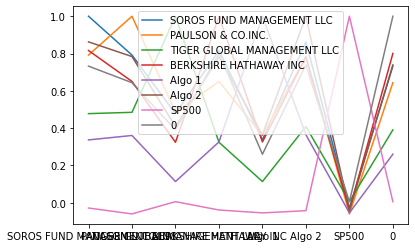

In [104]:
# Calculate and plot the correlation
allcomb_df.corr()
allcomb_df.corr().plot()


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [106]:
# Calculate and plot Beta
# Calculate covariance of weighted portfolio
cov_port = threestocksweight.cov(allcomb_df["SP500"])
# Calculate variance of S&P 500

var_port = allcomb_df["SP500"].var()

# Computing beta
beta_port = cov_port/var_port
print(beta_port)
# Plot beta trend
beta_port.plot() 

0.007777644779290083


AttributeError: 'numpy.float64' object has no attribute 'plot'

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [107]:
# Calculate Annualized Sharpe Ratios

# Annualized Sharpe Ratios
sr_all = allcomb_df.mean() / allcomb_df.std()

asr_all = sr_all * np.sqrt(252)

asr_all

SOROS FUND MANAGEMENT LLC      0.380007
PAULSON & CO.INC.              0.227577
TIGER GLOBAL MANAGEMENT LLC   -1.066635
BERKSHIRE HATHAWAY INC         0.103006
Algo 1                         2.001260
Algo 2                         0.007334
SP500                         -0.427676
0                              0.876152
dtype: float64

<AxesSubplot:>

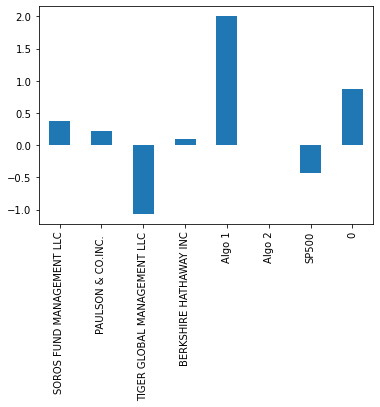

In [108]:
# Visualize the sharpe ratios as a bar plot
asr_all.plot(kind="bar")

### How does your portfolio do?

Write your answer here!

In [ ]:
#My portfolio "0" does pretty well compared to the rest. The higher the Sharpe Ratio the best the returns have been compared to the risk taken. The only one that beats mine is Algo 1.